# 13. Dynamiske systemer 

## Krefter og bevegelse 

### Oppgave 1
**a)** Tegningen bør inneholde en kraftpil for gravitasjonen, og en for luftmotstand.

**b)** Når vi ser bort fra luftmotstanden har vi fra Newtons 2. lov at:

$$ \sum F = ma $$

$$ \sum F = -G = -mg $$

$$ ma = -mg $$

$$ a = -g $$

Siden akselerasjonen er konstant lik -9.81 (forutsatt havnivå og positiv retning valgt oppover), kan vi finne _v_ og _s_ ved å bruke bevegelseslikningene for konstant akselerasjon.

**c)**

Vi kan lage en modell med kvadratisk luftmotstand. Deretter kan du i d) eksperimentere med en lineær luftmotstand og ulike verdier av _k_. I uttrykket for luftmotstand bruker vi $L = -k\cdot |v|\cdot v$ for at luftmotstanden skal være motsatt rettet av hastigheten.

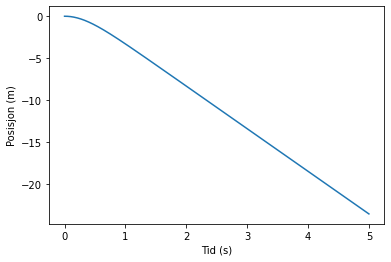

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanter
m = 5.0E-7       # masse i kg
g = 9.81         # tyngdeakselerasjon i m/s^2
k = 1.9E-7       # luftmotstandskoeffisien for vanndråpen
v0 = 0           # startfart
s0 = 0           # startposisjon i y-retning

# Tidsparametere
dt = 0.01        # tidsintervall
T = 5            # sluttiden
N = int(T/dt)+1  # antall iterasjoner

# Arrayer
t = np.zeros(N)
v = np.zeros(N)
s = np.zeros(N)

# Initialiserer arrayene
s[0] = s0
v[0] = v0

for i in range(N-1):
    a = -g - k*v[i]*abs(v[i])/m
    v[i+1] = v[i] + a*dt
    s[i+1] = s[i] + v[i]*dt
    t[i+1] = t[i] + dt
    
plt.plot(t,s)
plt.xlabel('Tid (s)')
plt.ylabel('Posisjon (m)')
plt.show()

## Populasjonsdynamikk

### Oppgave 2
**a)** Faktorer som påvirker slike populasjoner er blant annet plass, årstidsvekslinger, tilgang til mat og vann, stress, sykdom og parasitter. Vi trenger ikke nødvendigvis å ta hensyn til bæreevnen til ugla, fordi modellen tar utgangspunkt i at ugla begrenses av musepopulasjonen.

**b)** Vi kan bruke Lotka-Volterra-likningene til å modellere populasjonsveksten.

$$M'(t) = aM(t)(1- \frac{M(t)}{b}) - cM(t)U(t)$$

Her er $M'(t)$ endringen i antall mus, justert av vekstraten $a$. Denne er avhengig av faktorene som er nevnt i a). Konstanten $b$ er bæreevnen som begrenser antall individer i populasjonen, og $c$ er både naturlig dødsrate og møteraten mellom ugler og mus. Denne konstanten er spesielt avhengig av tettheten til populasjonene, og hvilket miljø de lever i. For å beskrive endringen i uglepopulasjonen, $U't()$ kan vi bruke følgende sammenheng:

$$U'(t) = dM(t)U(t) - eU(t)$$

Her er $d$ en kombinert fødsels- og møterate for uglene. Konstanten $d$ vil ofte være lavere enn $c$ fordi et møte mellom ugle og mus ofte resulterer i at en mus dør, men ikke at en ny ugle blir født! Konstanten $e$ er naturlig dødsrate.

**c)** En programskisse kan se slik ut:


```
Konstanter: a,b,c,d,e,M0,U0
Tidsvariabler: dt, tid_slutt, N
Arrayer: M, U, t
Startverdier av arrayer

Gjenta N-1 ganger:
    Mder = aM(1-M/b) - cMU
    Uder = dMU - eU
    M = M + Mder*dt
    U = U + UDer*dt
    t = t + dt
```

**d)** Vi kan kopiere plottemetoden fra boka, men det er lurt å lage resten selv. Vi velger tid, konstanter og tid som vi ønsker. Deretter kan vi gjerne evaluere resultatene og gjøre nye valg basert på dette.

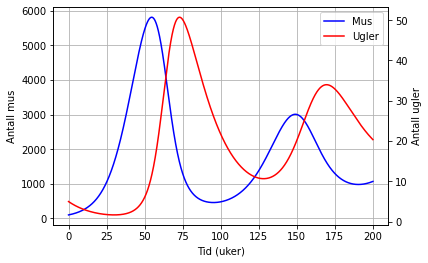

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Initialbetingelser
M0 = 100          # antall mus ved t = 0
U0 = 5            # antall ugler ved t = 0
a = 0.11          # reproduksjonsrate, mus
b = 10000         # bæreevne, mus
c = 0.004         # mus-ugle møterate
d = 0.000034      # reproduksjon og mat, ugler
e = 0.055         # dødsrate for ugler

#Tidssteg
dt = 0.001        # tidssteg
tid = 200         # antall uker
N = int(tid/dt)+1 # antall intervaller

#Arrayer
t = np.zeros(N)
M = np.zeros(N)
U = np.zeros(N)

# Initierer arrayene
M[0] = M0
U[0] = U0

# Eulers metode
for i in range(N-1):
    Mder = a*M[i]*(1 - M[i]/b)  - c*M[i]*U[i]
    Uder = d*M[i]*U[i] - e*U[i]
    M[i+1] = M[i] + Mder*dt
    U[i+1] = U[i] + Uder*dt
    t[i+1] = t[i] + dt

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, M, '-b', label = 'Mus')
ax2 = ax.twinx()
data2 = ax2.plot(t, U, '-r', label = 'Ugler')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc=0)

ax.grid()
ax.set_xlabel("Tid (uker)")
ax.set_ylabel("Antall mus")
ax2.set_ylabel("Antall ugler")
plt.show()

## Reaksjonsfart

### Oppgave 3

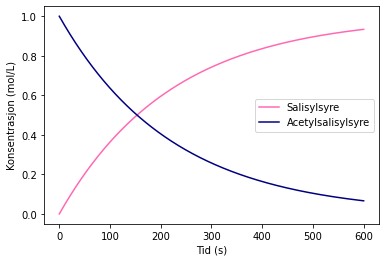

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanter
k0 = 0.003627
kH = 7106.41
H = 1.26E-7

# Tidsparametere
t0 = 0
tid_slutt = 600 # Tid i minutter
dt = 1E-3
N = int((tid_slutt-t0)/dt) + 1

# Arrayer
A = np.zeros(N)
S = np.zeros(N)
t = np.zeros(N)

# Ratelovene
def dA(A):
    return -(k0 + kH*H)*A

def dS(A):
      return (k0 + kH*H)*A

# Forward Euler
def euler(A0, S0):
    A[0] = A0
    S[0] = S0
    for i in range(N-1):
        A[i+1] = A[i] + dA(A[i])*dt
        S[i+1] = S[i] + dS(A[i])*dt
        t[i+1] = t[i] + dt
    return A, S, t

A, S, t = euler(1, 0)

plt.plot(t,S, label = 'Salisylsyre', color = 'hotpink')
plt.plot(t,A, label = 'Acetylsalisylsyre', color = 'navy')
plt.xlabel('Tid (s)')
plt.ylabel('Konsentrasjon (mol/L)')
plt.legend(loc=0)
plt.show()